In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#EDA--
#data analysis-- shape, info(), describe(), dtypes, corr()
#missing value analysis
#outlier analysis
#visualization--

#supervised model building part-- classification model
#independt and depednt data
#divide the data into train and test set
#create your model
#train your model
#test your model-- predict()
#performance of the model-- accuracy score, confusion matrix, classification_report

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [ ]:
#years of exp-- 20 years, 19 yrears, 10 years-- independt data
#i want to predict the salary of the person-- target value/ dependnet data

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#col-- object--- fill the nan values by the mode of the col
#col-- num-- fill the nan values by mean/median

In [ ]:
# 20, 30,25, 79,10,2, 70, (50-60), 80, 2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
df.columns

In [13]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
df[df['chol']>300].shape

(43, 14)

In [11]:
df[(df['chol']>300) & (df['age']>40)].shape

(42, 14)

In [12]:
df[df['chol']>300].count()

age         43
sex         43
cp          43
trestbps    43
chol        43
fbs         43
restecg     43
thalach     43
exang       43
oldpeak     43
slope       43
ca          43
thal        43
target      43
dtype: int64

In [ ]:
f=df[df['thal']==2]
f

In [ ]:
f[f['target']==1].shape

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
#left skewed data-- mean, median, mode

In [ ]:
#right skewed data-- mode, median, mean

In [ ]:
df['age'].hist(grid=True, bins=10) 
plt.title('Age distribuition')

In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.

In [ ]:
sns.distplot(df[df['sex']==1]['age'],  label='Male')
sns.distplot(df[df['sex']==0]['age'], label='Female')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

In [ ]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

In [ ]:
sns.distplot(df['trestbps'], bins=10)
plt.title('Resting Blood pressure desnity plot');

In the above graph, we are having a normal distribution 

<AxesSubplot:xlabel='oldpeak'>

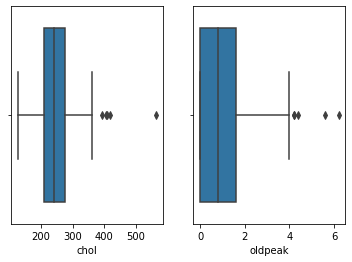

In [6]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=df, ax=axes[0])
sns.boxplot(x='oldpeak', data=df, ax=axes[1])

In [ ]:
age gender target
20   M      1
90         0-- outlier
     F      1

In [ ]:
data>=q1-1.5*IQR or data<=q3+1.5*IRQ

In [ ]:
#irq method of handing outliers
#lower limit-- q1-1.5*IQR
#upper limit-- q3+1.5*IQR

In [ ]:

#upper limit-- mean+3*sd
#lower limit-- mean-3*sd

In [ ]:
plt.rcParams['figure.figsize'] = (7,5)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#supervised model building part-- classification model
#independt and depednt data
#divide the data into train and test set
#create your model
#train your model
#test your model-- predict()
#performance of the model-- accuracy score, confusion matrix, classification_report

In [17]:
#df.drop(columns=['target'])
#if you want to take only age value as your independent data
pd.DataFrame(df['age'])

,age
0,63
1,37
2,41
3,56
4,57
...,...
298,57
299,45
300,68
301,57


In [ ]:
#we get error: ValueError: Expected 2D array, got 1D array instead:  


In [18]:
X = df.iloc[:, :-1]#independent variable should always be in a dataframe fromat(2D) data
y = df['target']#dependnet or target value
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [1]:
x=100  # taking example
y=100

In [2]:
df
age  cp  gender trestbps target
20    200  0      1       1
89    300  1      0        0


SyntaxError: invalid syntax (<ipython-input-2-40f5cf8337f8>, line 2)

In [ ]:
x_train-- remaining 70% of x 
y_train-- remaining 70% of y
x_test-- 30%of x== 30 records from the df and store those values in x_test
y_test-- 30%of y== 30 records from the df and store those values in y_test

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=30, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


In [30]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [31]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [32]:
y_train

6      1
139    1
28     1
37     1
224    0
      ..
145    1
251    0
140    1
301    0
293    0
Name: target, Length: 212, dtype: int64

In [ ]:
#DecisionTreeRegressor-- work with regression problem

In [ ]:
#classification algo--
# logistic regression
# decision tree classifier
# random forest classifier
#svm

#regression algo--
# linear regression
# decision tree regressor
# randon forest regressor

In [ ]:
x_train-- remaining 70% of x 
y_train-- remaining 70% of y
x_test-- 30%of x== 30 records from the df and store those values in x_test
y_test-- 30%of y== 30 records from the df and store those values in y_test

In [33]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2


In [34]:
clf = tree.DecisionTreeClassifier() #we are creating a decision tree model which is untrained
clf.fit(x_train,y_train)      #tarining a  a model

#testing the model--
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [35]:
y_train_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [36]:
y_test_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [37]:
y_test

97     1
122    1
84     1
231    0
110    1
      ..
48     1
24     1
178    0
41     1
23     1
Name: target, Length: 91, dtype: int64

In [ ]:
#pydotplus
#export_graphviz

In [38]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 1.0
Test score 0.7362637362637363


In [40]:
accuracy_score(y_test_pred,y_test)

0.7362637362637363

In [49]:
# helper function
def plot_confusionmatrix(predict,actual,label):
    print(f'{label} Confusion matrix')
    cf = confusion_matrix(predict,actual)
    sns.heatmap(cf,annot=True,fmt='G' )
    plt.show()

Train Confusion matrix


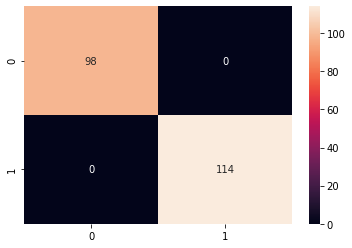

In [50]:
plot_confusionmatrix(y_train_pred,y_train,'Train')

Test Confusion matrix


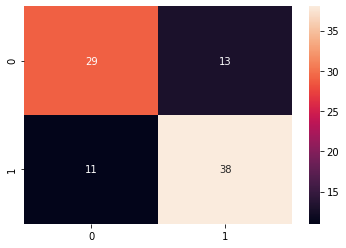

In [52]:
plot_confusionmatrix(y_test_pred,y_test,'Test')

In [39]:
confusion_matrix(y_test_pred,y_test)

array([[29, 13],
       [11, 38]], dtype=int64)

In [ ]:
(Tp+TN)/(TP+TN+FP+FN)


In [ ]:
#               Acutal Values
#Predicted        1   0
#             1  TP  FP
#             0  FN  TN 

In [53]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1 = pd.DataFrame(columns=['max_depth', 'accuracy'])
df1

,max_depth,accuracy


In [ ]:
#for the 1st loop, input_parameter will 1
#inside the for loop, it will create a dt model with 1 as the max depth vallue:
#model = tree.DecisionTreeClassifier(max_depth=1)

In [54]:
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True) 
df1

<ipython-input-54-5f55ff66e840>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
<ipython-input-54-5f55ff66e840>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
<ipython-input-54-5f55ff66e840>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
<ipython-input-54-5f55ff66e840>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= df1.append({'max_depth' : input_para

,max_depth,accuracy
0,1.0,79.120879
1,2.0,76.923077
2,3.0,74.725275
3,4.0,70.32967
4,5.0,74.725275
5,6.0,74.725275
6,7.0,71.428571
7,8.0,71.428571
8,9.0,73.626374
9,10.0,74.725275


In [55]:
model = tree.DecisionTreeClassifier(max_depth=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)*100

In [56]:
acc_score

79.12087912087912

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        39
           1       0.82      0.81      0.82        52

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [ ]:
#recall->tp / (tp + fn)
#The recall is the measure of our model correctly identifying True Positives. 
#Thus, for all the customers who actually have heart disease, 
#recall tells us how many were correctly identified as a heart patient.
#Layman definition: Of all the actual positive examples out there, 
#how many of them did I correctly predict to be positive?

#precision of class 0 = TP of class 0/total number of object 
#What is the Precision for our model? Yes, it is 0.843 or, when it predicts that a patient has heart disease, it is correct around 84% of the time.
#precision of class 1 = TP of class 1/total number of object 
#Layman definition: Of all the positive predictions I made, how many of them are truly positive?


#macro average = (precision of class 0 + precision of class 1)/2 

#weighted average is precision of all classes merge together
#weighted average = (TP of class 0 + TP of class 1)/(total number of class 0 + total number of class 1) 

#F1-score is a measure of a model's accuracy on a dataset
#a good F1 score means that you have low false positives and low false negatives, 
#Accuracy is used when the True Positives and True negatives are more important while 
#F1-score is used when the False Negatives and False Positives are crucial.
#Support is the number of actual occurrences of the class in the specified dataset.

# Accuracy tells you how many times the ML model was correct overall. 
# Precision is how good the model is at predicting a specific category. 
# Recall tells you how many times the model was able to detect a specific category.